In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv("loan.csv")

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.shape

(39717, 111)


##### Checking for columns with all Null and droping them from dataframe as they are of no use


In [5]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
loan.dropna(axis = 1, how = 'all', inplace = True)

In [7]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
loan.shape

(39717, 57)

##### found that only 57 columns left out of 111 which have data

##### Checking the unique values per column 
##### and removing the columns which have only one distinct value ( excluding the columns which have nulls and only one distinct value ) 

In [9]:
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [10]:
for col in loan.columns:
    if len(loan[col].unique()) == 1:
        loan = loan.drop(col,axis=1)

In [11]:
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq      

In [12]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0,0.0,0.0


#### only 51 coumns left for analysis

#### deleting the columns which has only one value or null as it is of no use

In [13]:
loan.drop(['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'], axis = 1, inplace = True)

In [14]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


#### finally only 48 columns left for analysis out of 111 columns

#### removing the columns which are irrevelant for defaulter analysis
- id, member_id, url, zip_code, addr_state 
  -- these columns holds unique identify for each customer and of no use for default analysis

- funded_amnt_inv, total_pymnt_inv, out_prncp_inv 
  -- these columns holds investor related details and are of no use

- collection_recovery_fee, desc, recoveries, total_rec_late_fee, total_rec_prncp, total_rec_int, total_pymnt, last_credit_pull_d, delinq_2yrs, revol_bal, out_prncp,last_pymnt_d,emp_title,title,pub_rec_bankruptcies
  -- irrevelant for defaulter analysis

- mths_since_last_delinq, mths_since_last_record, next_pymnt_d 
  -- least populated columns can not be used in analysis
  

- desc
  -- holds data in no particular format 


In [15]:
loan.drop(['id','member_id','url','zip_code','addr_state','funded_amnt_inv','total_pymnt_inv','out_prncp_inv','emp_title'
           ,'mths_since_last_delinq','total_rec_late_fee','total_rec_prncp','total_rec_int','title'
           ,'total_pymnt','mths_since_last_record','next_pymnt_d','out_prncp','pub_rec_bankruptcies'
           ,'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt'
           ,'last_credit_pull_d','delinq_2yrs','revol_bal','recoveries'
           ,'desc'], axis = 1, inplace = True) 

In [32]:
loan.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


In [17]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

#### We see that only 21 columns can actually help in default analysis
#### For default analysis the onging loan accounts are of no use, so filtering then out

In [20]:
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [26]:
(loan.isnull().sum()/len(loan.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

#### we noticed that there are very few rows where revol_util is not available hence deleting the rows with revol_util as null

In [34]:
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()


0

#### the emp_length column has a particular set of values, filling the NA with appropriate values

In [35]:
loan.emp_length.value_counts()

10+ years    8487
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

#### observed that mode of emp_length is 10+ years, updating NA with mode

In [38]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
(loan.isnull().sum()/len(loan.index))*100

loan_amnt              0.0
funded_amnt            0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
dtype: float64

#### now data completeness is achieved. Next is fixing data quality
### Cheacking for outliers

<AxesSubplot:xlabel='annual_inc'>

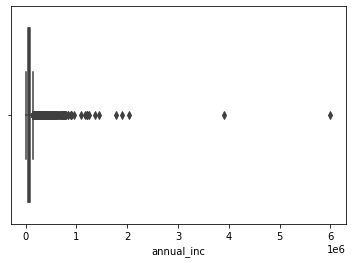

In [40]:
sns.boxplot(loan['annual_inc'])


#### it is visible that there are few data points with outliers, taking 90% as threshold 

In [41]:
 annual_inc_90 = loan['annual_inc'].quantile(0.90)

In [43]:
loan = loan[loan.annual_inc <= annual_inc_90]

<AxesSubplot:xlabel='annual_inc'>

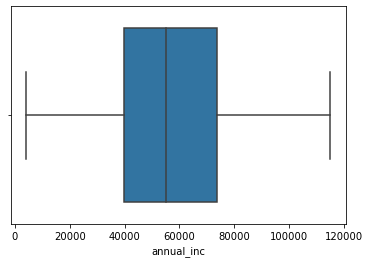

In [44]:
sns.boxplot(loan['annual_inc'])

<AxesSubplot:xlabel='loan_amnt'>

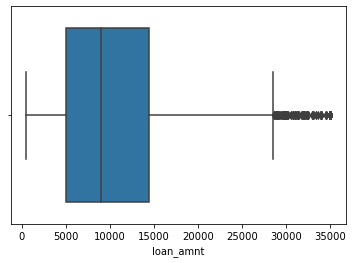

In [45]:
sns.boxplot(loan['loan_amnt'])

<AxesSubplot:xlabel='dti'>

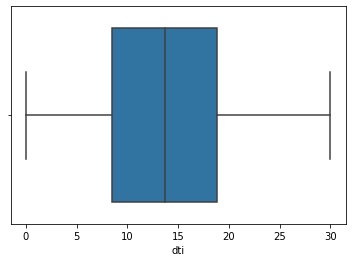

In [46]:
sns.boxplot(loan['dti'])

#### Numeric columns annual_inc, loan_amnt, dti are good to go with analysis now

### Column Value Formatting

In [48]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34675 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34675 non-null  int64  
 1   funded_amnt          34675 non-null  int64  
 2   term                 34675 non-null  object 
 3   int_rate             34675 non-null  object 
 4   installment          34675 non-null  float64
 5   grade                34675 non-null  object 
 6   sub_grade            34675 non-null  object 
 7   emp_length           34675 non-null  object 
 8   home_ownership       34675 non-null  object 
 9   annual_inc           34675 non-null  float64
 10  verification_status  34675 non-null  object 
 11  issue_d              34675 non-null  object 
 12  loan_status          34675 non-null  object 
 13  purpose              34675 non-null  object 
 14  dti                  34675 non-null  float64
 15  earliest_cr_line     34675 non-null 

#### column revol_util and int_rate have % symbol and kept as object, 
#### removing % symbol and changing data type as float


In [50]:
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))


In [51]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34675 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34675 non-null  int64  
 1   funded_amnt          34675 non-null  int64  
 2   term                 34675 non-null  object 
 3   int_rate             34675 non-null  float64
 4   installment          34675 non-null  float64
 5   grade                34675 non-null  object 
 6   sub_grade            34675 non-null  object 
 7   emp_length           34675 non-null  object 
 8   home_ownership       34675 non-null  object 
 9   annual_inc           34675 non-null  float64
 10  verification_status  34675 non-null  object 
 11  issue_d              34675 non-null  object 
 12  loan_status          34675 non-null  object 
 13  purpose              34675 non-null  object 
 14  dti                  34675 non-null  float64
 15  earliest_cr_line     34675 non-null 

#### treating emp_length column
    - converting <1 as 0, 10+ as 10


In [55]:
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] 
                                                                                    if "+" in x else x.split()[0])))

TypeError: argument of type 'int' is not iterable

In [56]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34675 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34675 non-null  int64  
 1   funded_amnt          34675 non-null  int64  
 2   term                 34675 non-null  object 
 3   int_rate             34675 non-null  float64
 4   installment          34675 non-null  float64
 5   grade                34675 non-null  object 
 6   sub_grade            34675 non-null  object 
 7   emp_length           34675 non-null  int64  
 8   home_ownership       34675 non-null  object 
 9   annual_inc           34675 non-null  float64
 10  verification_status  34675 non-null  object 
 11  issue_d              34675 non-null  object 
 12  loan_status          34675 non-null  object 
 13  purpose              34675 non-null  object 
 14  dti                  34675 non-null  float64
 15  earliest_cr_line     34675 non-null 

In [57]:
loan['emp_length']

0        10
1         0
2        10
3        10
5         3
         ..
39711     5
39712     4
39713     3
39714     0
39716     0
Name: emp_length, Length: 34675, dtype: int64

#### All the data is sanitize, starting fraud analysis using visulization 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

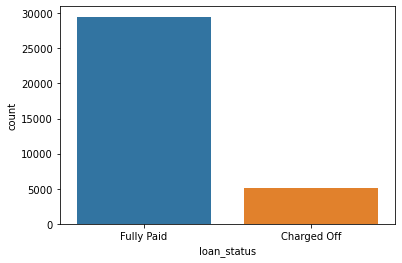

In [59]:
sns.countplot(x = 'loan_status', data = loan)

In [62]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34675 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34675 non-null  int64  
 1   funded_amnt          34675 non-null  int64  
 2   term                 34675 non-null  object 
 3   int_rate             34675 non-null  float64
 4   installment          34675 non-null  float64
 5   grade                34675 non-null  object 
 6   sub_grade            34675 non-null  object 
 7   emp_length           34675 non-null  int64  
 8   home_ownership       34675 non-null  object 
 9   annual_inc           34675 non-null  float64
 10  verification_status  34675 non-null  object 
 11  issue_d              34675 non-null  object 
 12  loan_status          34675 non-null  object 
 13  purpose              34675 non-null  object 
 14  dti                  34675 non-null  float64
 15  earliest_cr_line     34675 non-null 

## Univariate Analysis

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

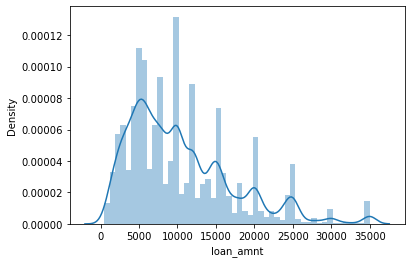

In [63]:
sns.distplot(loan['loan_amnt'])

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

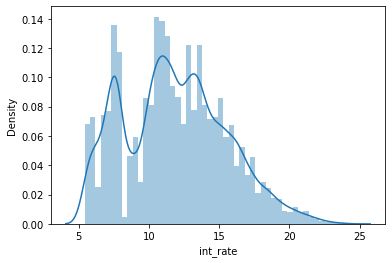

In [65]:
sns.distplot(loan['int_rate'])

<AxesSubplot:xlabel='installment', ylabel='Density'>

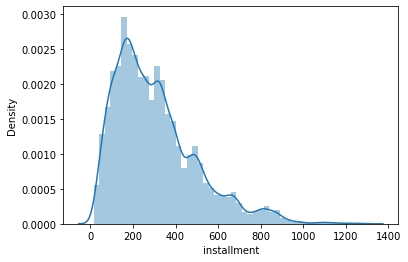

In [66]:
sns.distplot(loan['installment'])

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

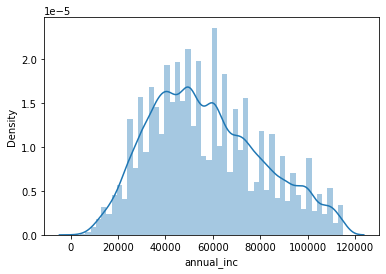

In [67]:
 sns.distplot(loan['annual_inc'])

<AxesSubplot:xlabel='dti', ylabel='Density'>

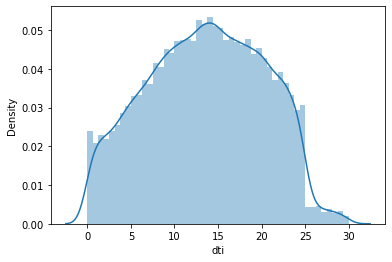

In [68]:
 sns.distplot(loan['dti'])

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

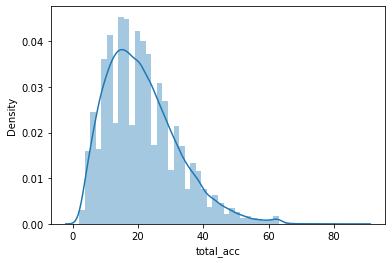

In [69]:
 sns.distplot(loan['total_acc'])

<AxesSubplot:xlabel='open_acc', ylabel='Density'>

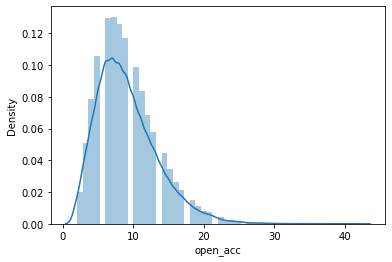

In [72]:
 sns.distplot(loan['open_acc'])

#### On observing the loan_amnt, int_rate, installment, annual_inc, dti, total_acc, open_acc graph we can say that for default analysis, we need to create buckets of the KPI.

<AxesSubplot:xlabel='int_rate_bin', ylabel='count'>

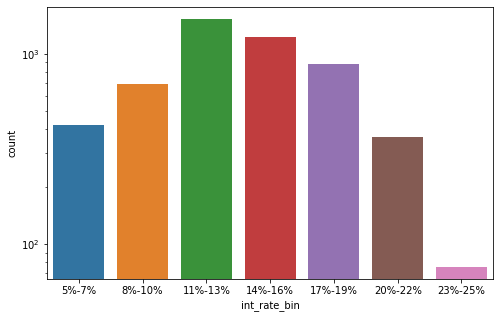

In [89]:
#creatings bins for int_rate
loan['int_rate_bin'] = pd.cut(loan['int_rate'], bins=7,precision =0,labels=['5%-7%','8%-10%','11%-13%','14%-16%','17%-19%','20%-22%','23%-25%'])
fig, ax = plt.subplots(figsize = (8,5))
ax.set_yscale('log')
sns.countplot(x='int_rate_bin', data=loan[loan.loan_status == 'Charged Off'])

# Loans given at 11-13% interest rate have more tendency to default

<AxesSubplot:xlabel='installment_bin', ylabel='count'>

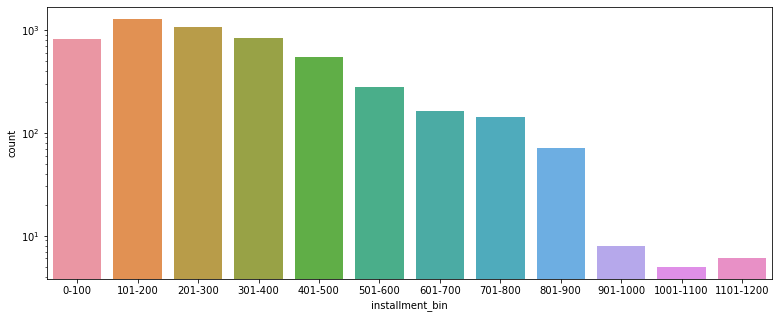

In [92]:
#creatings bins for installment
loan['installment_bin'] = pd.cut(loan['installment'], bins=12,precision =0,labels=['0-100','101-200','201-300','301-400','401-500','501-600','601-700','701-800','801-900','901-1000','1001-1100','1101-1200'])
fig, ax = plt.subplots(figsize = (13,5))
ax.set_yscale('log')
sns.countplot(x='installment_bin', data=loan[loan.loan_status == 'Charged Off'])

# Loans given for 101-200 installment rate have more tendency to default

<AxesSubplot:xlabel='annual_inc_bin', ylabel='count'>

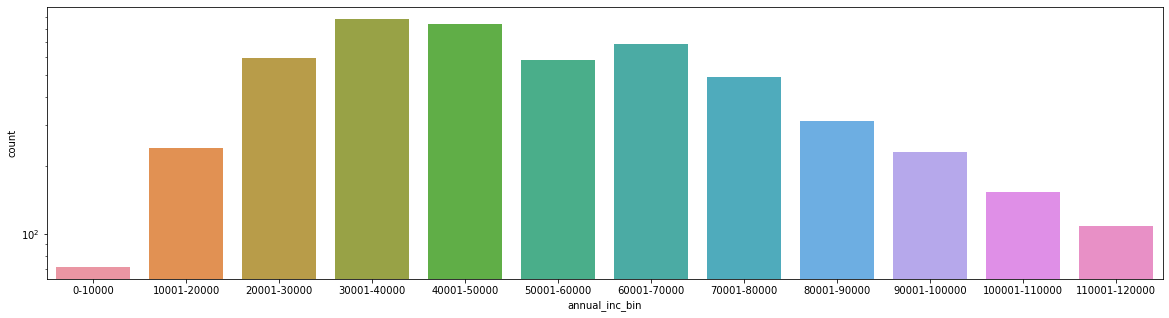

In [101]:
#creatings bins for annual_inc
loan['annual_inc_bin'] = pd.cut(loan['annual_inc'], bins=12,precision =0,labels=['0-10000','10001-20000','20001-30000','30001-40000','40001-50000','50001-60000','60001-70000','70001-80000','80001-90000','90001-100000','100001-110000','110001-120000'])
fig, ax = plt.subplots(figsize = (20,5))
ax.set_yscale('log')
sns.countplot(x='annual_inc_bin', data=loan[loan.loan_status == 'Charged Off'])

# Loans given for 30001-40000 annual_inc  have more tendency to default

<AxesSubplot:xlabel='dti_bin', ylabel='count'>

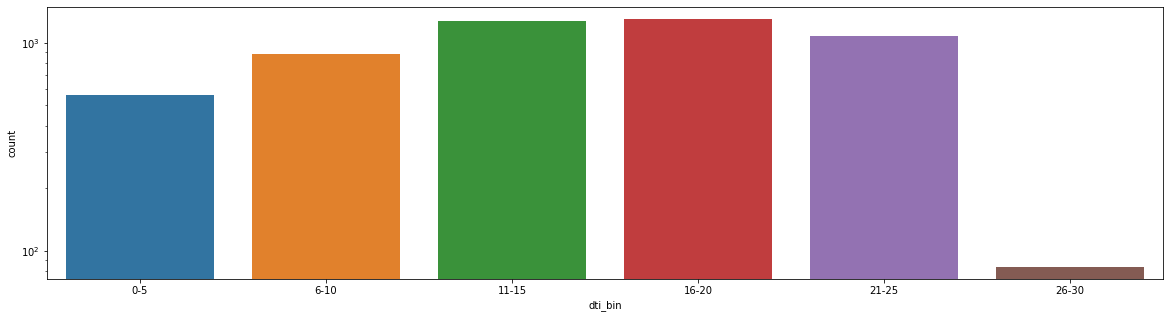

In [102]:
#creatings bins for dti
loan['dti_bin'] = pd.cut(loan['dti'], bins=6,precision =0,labels=['0-5','6-10','11-15','16-20','21-25','26-30'])
fig, ax = plt.subplots(figsize = (20,5))
ax.set_yscale('log')
sns.countplot(x='dti_bin', data=loan[loan.loan_status == 'Charged Off'])

# Loans given for 11-20 dti  have more tendency to default

<AxesSubplot:xlabel='revol_util_bin', ylabel='count'>

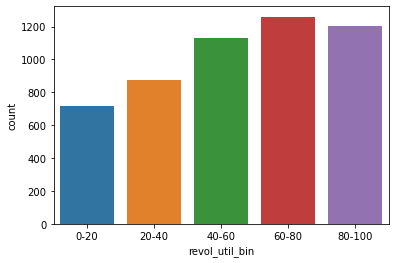

In [114]:
#creatings bins for revol_util
loan['revol_util_bin'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
sns.countplot(x='revol_util_bin',data=loan[loan.loan_status == 'Charged Off'])


# Loans given for 60-80 revol_util have more tendency to default


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

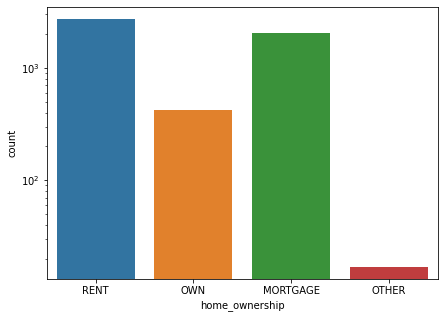

In [105]:
# analysing home_ownership
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

# Loans given to people on rent have more tandency to default

<AxesSubplot:xlabel='purpose', ylabel='count'>

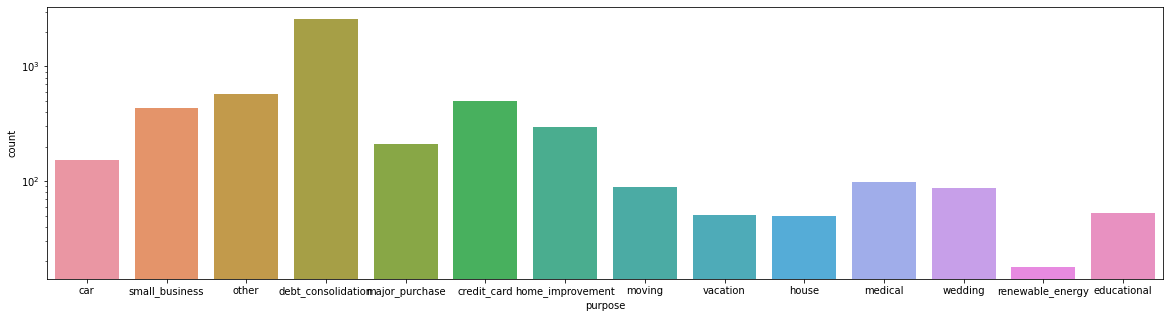

In [107]:
# analysing purpose
fig,ax = plt.subplots(figsize = (20,5))
ax.set_yscale('log')
sns.countplot(x='purpose', data=loan[loan['loan_status']=='Charged Off'])

# Loans given to people for debt_consolidation have more tendency to default

# Bivariate analysis

#### Comparing Income with varios KPI

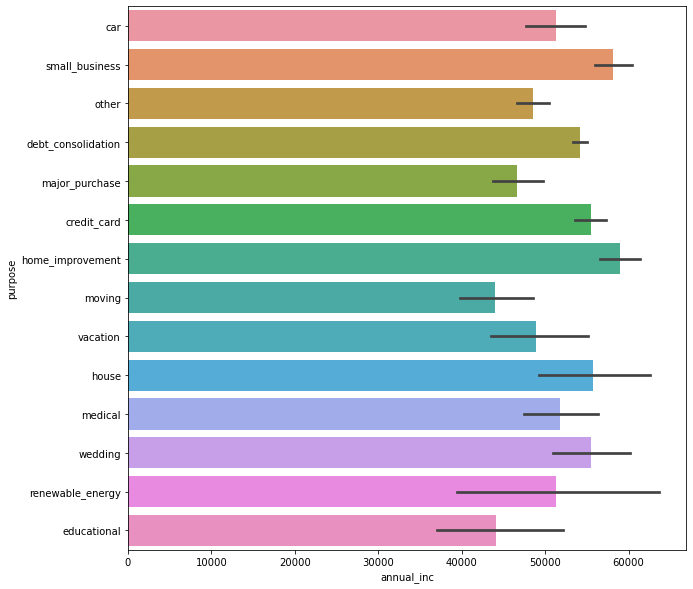

In [121]:
# income vs purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan[loan['loan_status']=='Charged Off'],x='annual_inc', y='purpose')
plt.show()

# Peopele with salary of 55000 - 60000 and taking loan for home improvement have more tendency to default

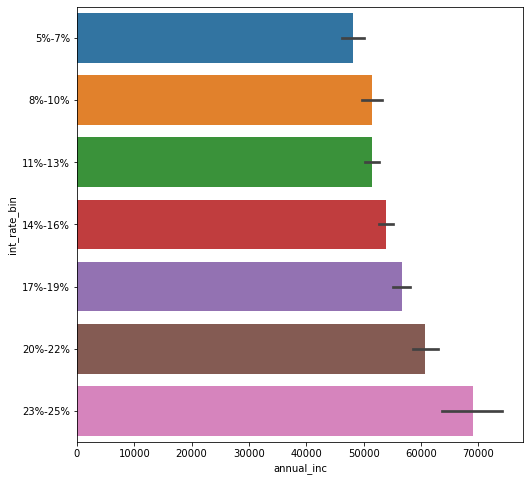

In [129]:
# income vs int_rate
plt.figure(figsize=(8,8))
sns.barplot(data =loan[loan['loan_status']=='Charged Off'],x='annual_inc', y='int_rate_bin')
plt.show()

# People with salary of 65000 - 70000 and given loan at 23-25% intrest have more tendency to default

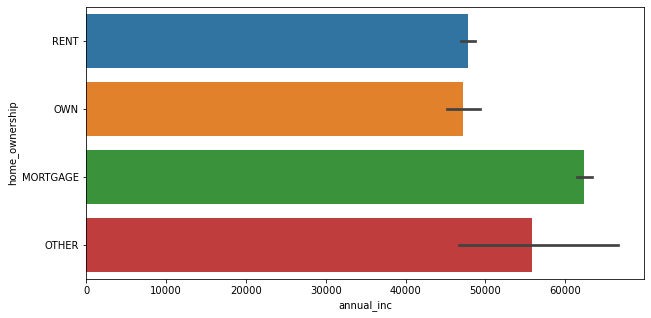

In [127]:
# income vs home_ownership
plt.figure(figsize=(10,5))
sns.barplot(data =loan[loan['loan_status']=='Charged Off'],x='annual_inc', y='home_ownership')
plt.show()

# Peopele with salary greater then 60000 and have home on mortgage have more tandency to default

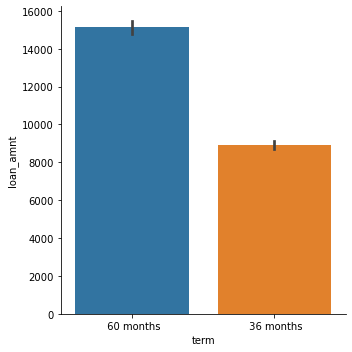

In [135]:
#loan amount vs status
sns.catplot(x = 'term', y = 'loan_amnt', data = loan[loan['loan_status']=='Charged Off'],kind='bar')
#  Higher values loans given on high interest rate have more tendency to default